# Exploring Slot Machine Data

In [27]:
# 필요한 패키지 불러오기

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [69]:
labels = ['10', 'J', 'Q', 'K', 'A', 'Ca', 'Co', 'D', 'Cr', 'W', 'R']

In [10]:
# csv 파일 불러오기

slot_result = pd.read_csv('../data/slot_machine/platinum_csv/pl_all.csv')
slot_result.head()

,img,classname
0,platinum_0_0.jpg,Ca
1,platinum_0_1.jpg,A
2,platinum_0_2.jpg,Q
3,platinum_0_3.jpg,W
4,platinum_0_4.jpg,A


In [11]:
# 각 칸의 결과마다 game, row, col column 생성

slot_result_game = [int(i_name.split('_')[1]) for n, i_name in enumerate(slot_result['img'])]
slot_result_row = [int(i_name.split('_')[2].split('.')[0]) % 3 + 1 for n, i_name in enumerate(slot_result['img'])]
slot_result_col = [int(i_name.split('_')[2].split('.')[0]) // 3 + 1 for n, i_name in enumerate(slot_result['img'])]

In [12]:
slot_result['game'] = slot_result_game
slot_result['row'] = slot_result_row
slot_result['col'] = slot_result_col

slot_result.head(15)

,img,classname,game,row,col
0,platinum_0_0.jpg,Ca,0,1,1
1,platinum_0_1.jpg,A,0,2,1
2,platinum_0_2.jpg,Q,0,3,1
3,platinum_0_3.jpg,W,0,1,2
4,platinum_0_4.jpg,A,0,2,2
5,platinum_0_5.jpg,A,0,3,2
6,platinum_0_6.jpg,10,0,1,3
7,platinum_0_7.jpg,Cr,0,2,3
8,platinum_0_8.jpg,Co,0,3,3
9,platinum_0_9.jpg,10,0,1,4


In [31]:
tmp = []
slot_result_per_game = []
for n, x in enumerate(slot_result['classname']):
    tmp.append(x)
    if (n+1) % 15 == 0:
        slot_result_per_game.append(tmp)
        tmp = []

## Simulation 데이터 생성

In [33]:
def getPlatinumColType():
    i = np.random.randint(1, 201)
    if i <= 109:
        return 3
    elif i <= 186 and i > 109:
        return 2
    elif i > 186:
        return 1

def getPlatinumSymbol(start, end):
    i = np.random.randint(start, end)
    if i <= 27:
        return 'Q'
    elif i <= 52 and i > 27:
        return '10'
    elif i <= 76 and i > 52:
        return 'K'
    elif i <= 99 and i > 76:
        return 'A'
    elif i <= 118 and i > 99:
        return 'J'
    elif i <= 137 and i > 118:
        return 'Ca'
    elif i <= 155 and i > 137:
        return 'Cr'
    elif i <= 171 and i > 155:
        return 'D'
    elif i <= 186 and i > 171:
        return 'Co'
    elif i <= 192 and i > 186:
        return 'W'
    elif i > 192:
        return 'R'

def spin_platinum():
    game = []
    start = 1
    end = 201
    for i in range(5):
        tmp = []
        if game.count('R') >= 9:
            end = 193
        col_type = getPlatinumColType()
        if col_type == 3:
            for i in range(col_type):
                tmp.append(getPlatinumSymbol(start, end))
        elif col_type == 2:
            tmp.extend([getPlatinumSymbol(start, end)]*2)
            tmp.append(getPlatinumSymbol(start, end))
            np.random.shuffle(tmp)
        else:
            tmp.extend([getPlatinumSymbol(start, end)]*3)
        game.extend(tmp)
    return game

In [40]:
simul_result_per_game = []
for i in range(2000):
    simul_result_per_game.append(spin_platinum())

In [37]:
simul_result = slot_result[['classname', 'game', 'row', 'col']]

In [38]:
simul_result.head()

,classname,game,row,col
0,Ca,0,1,1
1,A,0,2,1
2,Q,0,3,1
3,W,0,1,2
4,A,0,2,2


In [41]:
simul_classname = []

for game in simul_result_per_game:
    for x in game:
        simul_classname.append(x)

In [44]:
simul_result['classname'] = simul_classname

C:\Users\Lee\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
simul_result.head()

,classname,game,row,col
0,Ca,0,1,1
1,Co,0,2,1
2,Co,0,3,1
3,K,0,1,2
4,K,0,2,2


## 1. 비교 - RICHHITS

In [54]:
r_count_r = []
for game in slot_result_per_game:
    r_count_r.append(game.count('R'))

In [55]:
pd.Series(r_count_r).value_counts()

0    1242
1     434
2     223
3      77
4      19
5       5
dtype: int64

In [49]:
r_count_s = []
for game in simul_result_per_game:
    r_count_s.append(game.count('R'))

In [50]:
pd.Series(r_count_s).value_counts()

0    1223
1     484
2     204
3      72
4      13
6       2
5       2
dtype: int64

In [56]:
df_rich = pd.DataFrame(columns=['r_count', 'hue'])
df_rich['r_count'] = r_count_r + r_count_s
df_rich['hue'] = ['real'] * 2000 + ['simul'] * 2000

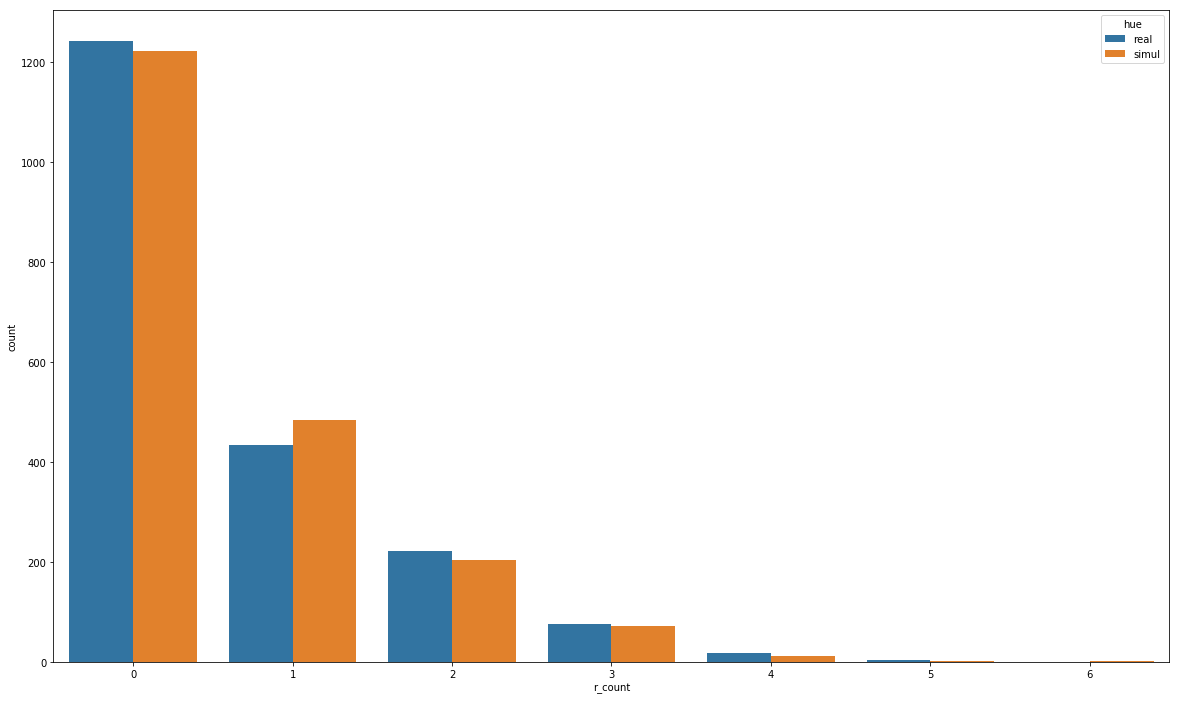

In [58]:
plt.figure(figsize=(20,12))
sns.countplot(x='r_count', data=df_rich, hue='hue')
plt.show()

## 2. 비교 - 각 Symbol의 출현 확률

In [59]:
slot_result['classname'].value_counts() / len(slot_result) * 100

Q     13.236667
10    12.553333
K     12.073333
A     11.506667
J      9.543333
Ca     9.520000
Cr     8.760000
D      8.026667
Co     7.576667
R      4.040000
W      3.163333
Name: classname, dtype: float64

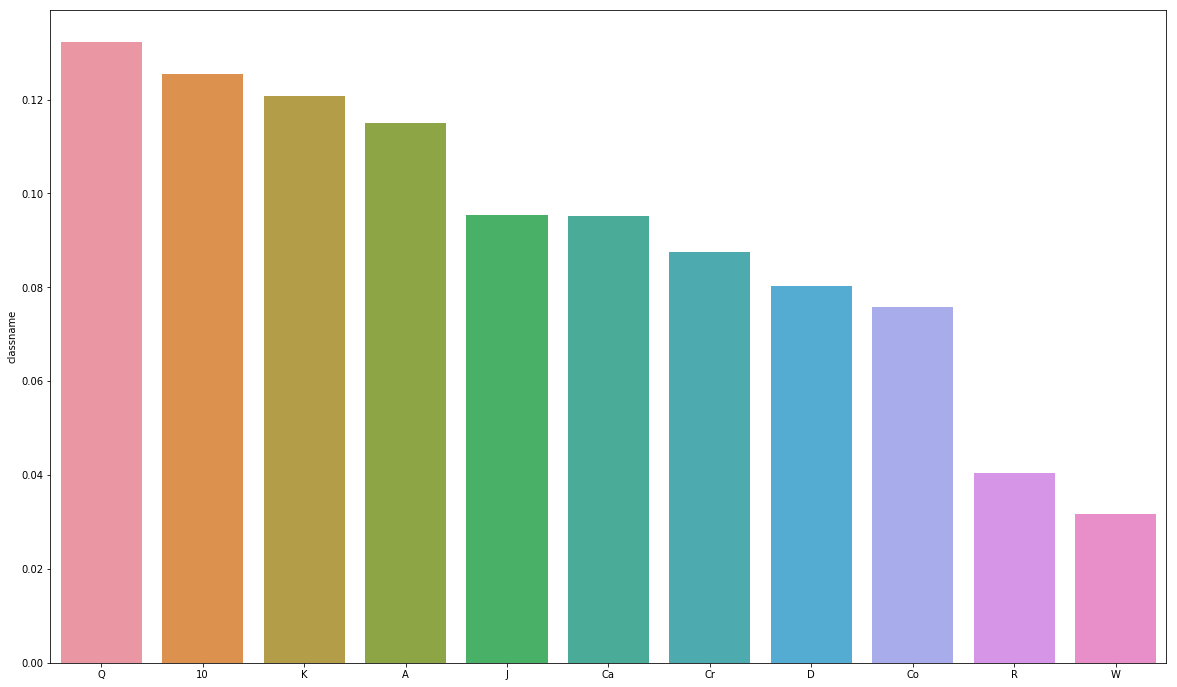

In [60]:
# 각 칸에서의 출현 확률

plt.figure(figsize=(20,12))
sns.barplot(x=slot_result['classname'].value_counts().index, y=slot_result['classname'].value_counts() / len(slot_result))
plt.show()

In [61]:
simul_result['classname'].value_counts() / len(simul_result) * 100

Q     13.563333
10    12.530000
K     11.786667
A     11.743333
J      9.606667
Ca     9.286667
Cr     9.076667
D      8.130000
Co     7.420000
R      3.940000
W      2.916667
Name: classname, dtype: float64

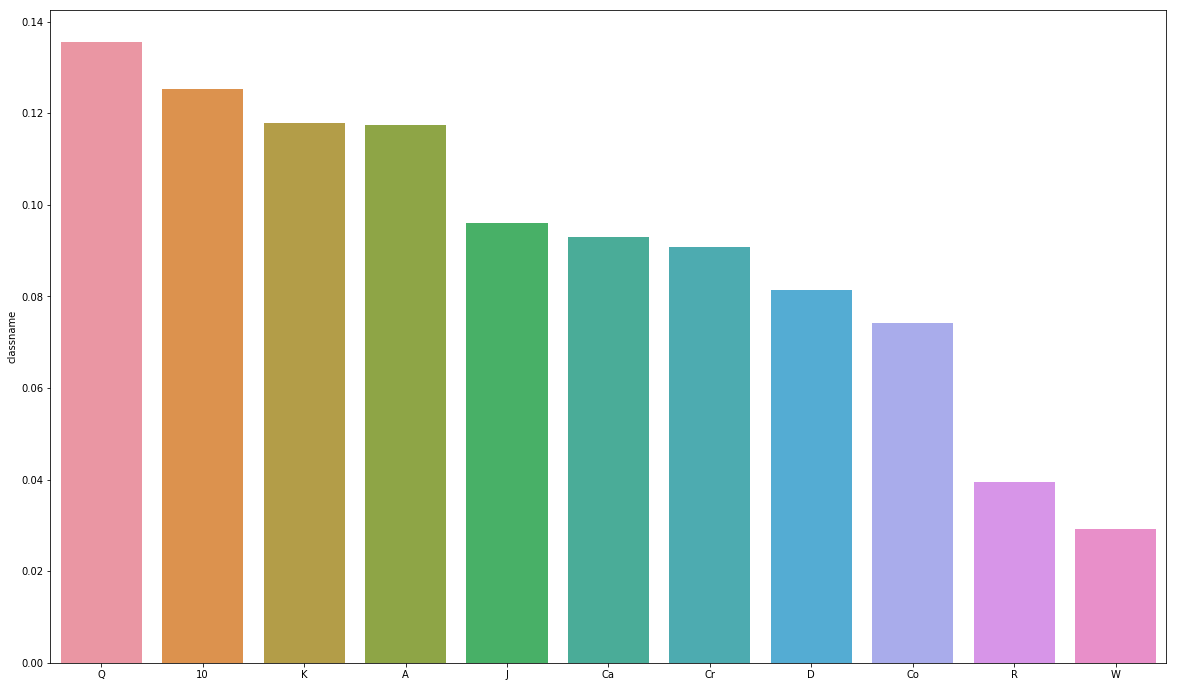

In [62]:
# 각 칸에서의 출현 확률

plt.figure(figsize=(20,12))
sns.barplot(x=simul_result['classname'].value_counts().index, y=simul_result['classname'].value_counts() / len(simul_result))
plt.show()

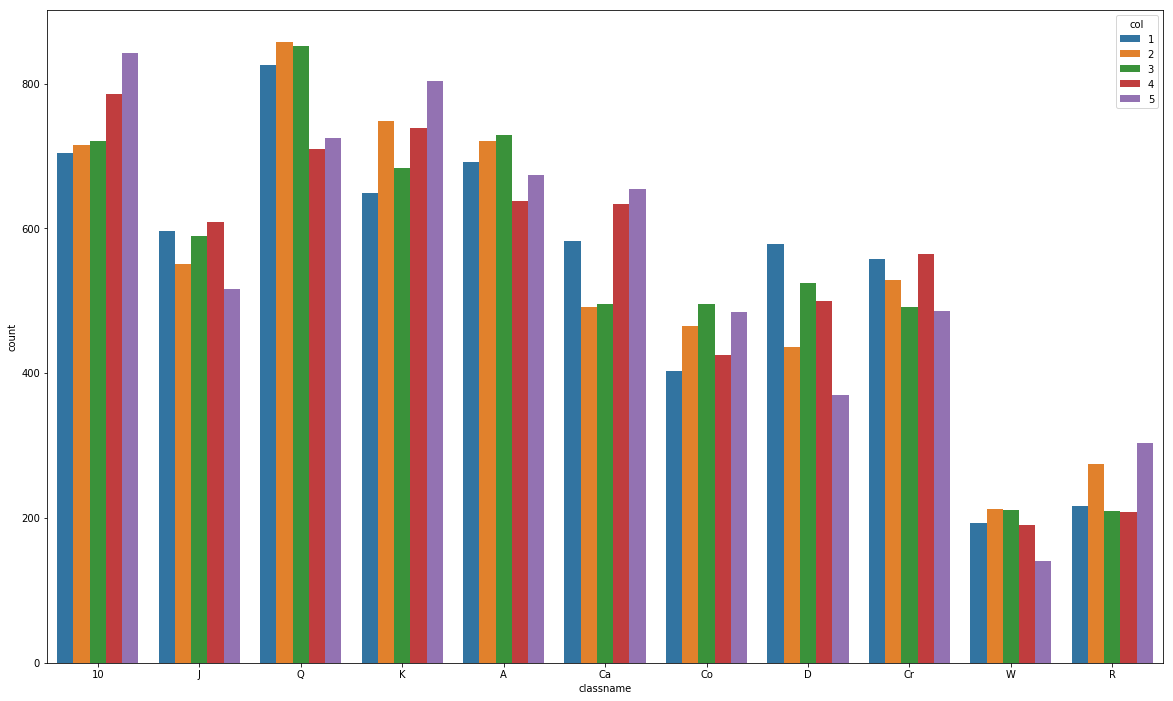

In [70]:
# 각 reel별 출현 횟수 시각화

plt.figure(figsize=(20,12))
sns.countplot(x='classname', data=slot_result, hue='col', order=labels)
plt.show()

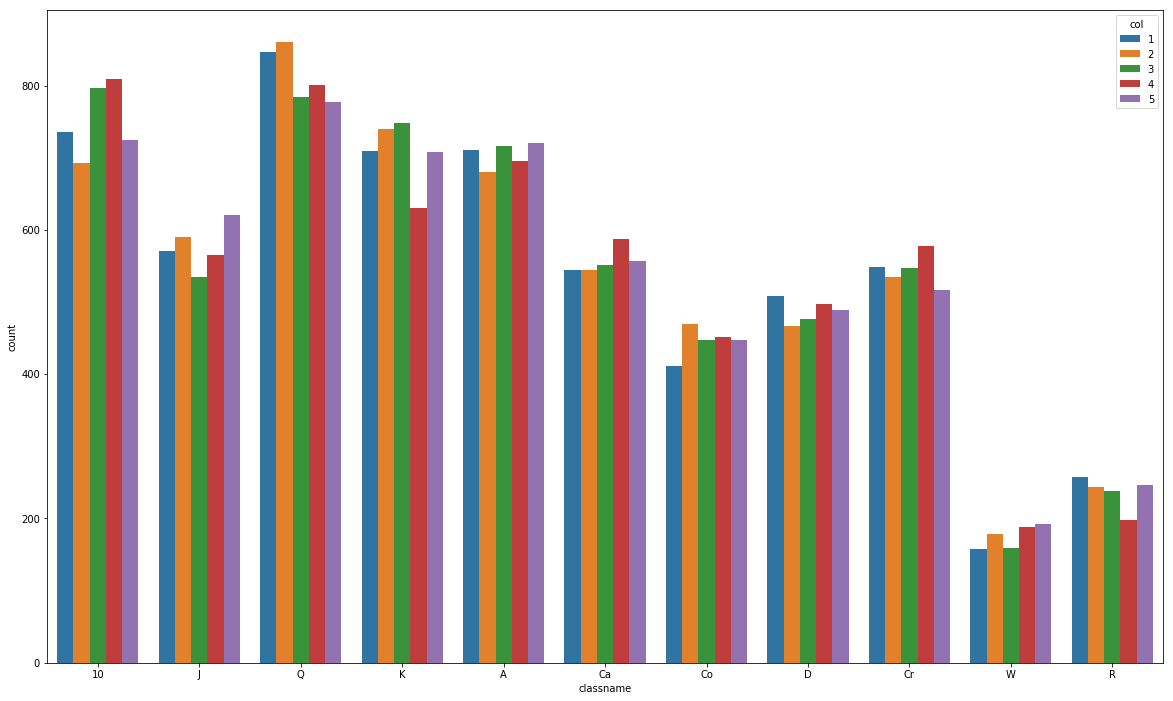

In [72]:
plt.figure(figsize=(20,12))
sns.countplot(x='classname', data=simul_result, hue='col', order=labels)
plt.show()

## 3. 비교 - 각 reel 마다 col_type 출현 빈도

In [84]:
def getReelInfo(df, reel):
    row_type = []
    reel_symbols = []
    r_list = []
    s = ''
    for n, row in enumerate(df[df['col'] == reel]['classname']):
        r_list.append(row)
        s += row
        if not (n + 1) % 3:
            if r_list[0] == r_list [1] and r_list[1] == r_list[2]:
                row_type.append('1')
            elif r_list[0] == r_list[1] and r_list[0] != r_list[2] and r_list[1] != r_list[2]:
                row_type.append('2-1')
            elif r_list[0] == r_list[2] and r_list[0] != r_list[1] and r_list[2] != r_list[1]:
                row_type.append('2-2')
            elif r_list[1] == r_list[2] and r_list[1] != r_list[0] and r_list[2] != r_list[0]:
                row_type.append('2-3')
            else:
                row_type.append('3')
            r_list = []
            reel_symbols.append(s)
            s= ''
    return row_type, reel_symbols

In [95]:
rt1_r, rs1_r = getReelInfo(slot_result, 1)
rt2_r, rs2_r = getReelInfo(slot_result, 2)
rt3_r, rs3_r = getReelInfo(slot_result, 3)
rt4_r, rs4_r = getReelInfo(slot_result, 4)
rt5_r, rs5_r = getReelInfo(slot_result, 5)

In [104]:
rt1_s, rs1_s = getReelInfo(simul_result, 1)
rt2_s, rs2_s = getReelInfo(simul_result, 2)
rt3_s, rs3_s = getReelInfo(simul_result, 3)
rt4_s, rs4_s = getReelInfo(simul_result, 4)
rt5_s, rs5_s = getReelInfo(simul_result, 5)

In [101]:
df_coltype = pd.DataFrame(columns=['col_type', 'hue'])
df_coltype['col_type'] = rt1_r + rt2_r + rt3_r + rt4_r + rt5_r
df_coltype['hue'] = ['reel_1'] * 2000 + ['reel_2'] * 2000 + ['reel_3'] * 2000 + ['reel_4'] * 2000 + ['reel_5'] * 2000

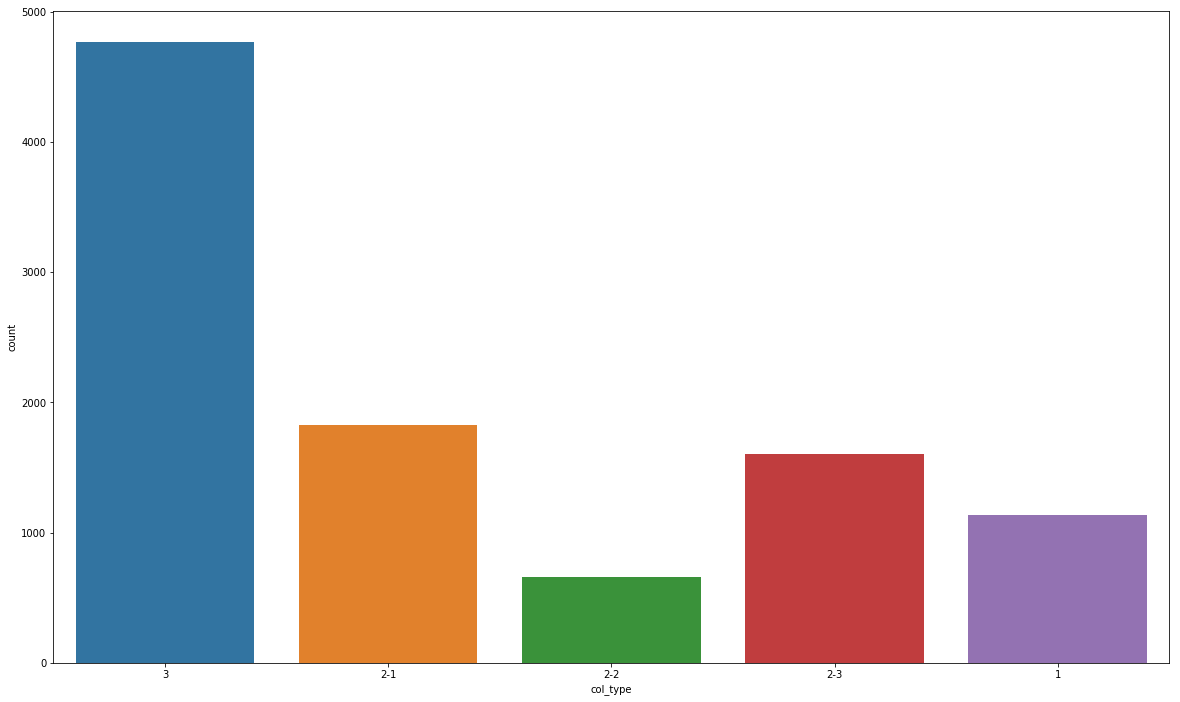

In [107]:
plt.figure(figsize=(20,12))
sns.countplot(x='col_type', data=df_coltype, order=['3', '2-1', '2-2', '2-3', '1'])
plt.show()

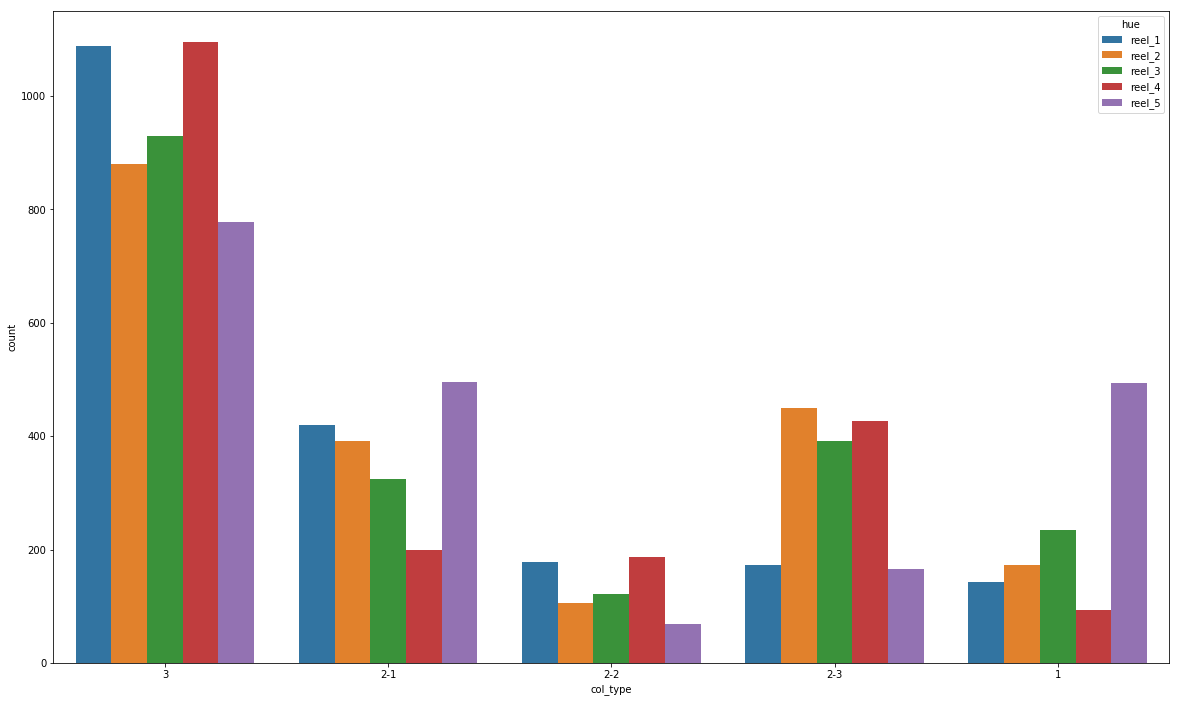

In [103]:
plt.figure(figsize=(20,12))
sns.countplot(x='col_type', data=df_coltype, hue='hue', order=['3', '2-1', '2-2', '2-3', '1'])
plt.show()

In [111]:
pd.Series(rt1_r).value_counts() / len(rt1_r) * 100

3      54.40
2-1    20.95
2-2     8.90
2-3     8.65
1       7.10
dtype: float64

In [112]:
pd.Series(rt2_r).value_counts() / len(rt2_r) * 100

3      44.00
2-3    22.50
2-1    19.60
1       8.65
2-2     5.25
dtype: float64

In [113]:
pd.Series(rt3_r).value_counts() / len(rt3_r) * 100

3      46.45
2-3    19.55
2-1    16.20
1      11.70
2-2     6.10
dtype: float64

In [114]:
pd.Series(rt4_r).value_counts() / len(rt4_r) * 100

3      54.80
2-3    21.30
2-1     9.95
2-2     9.30
1       4.65
dtype: float64

In [115]:
pd.Series(rt5_r).value_counts() / len(rt5_r) * 100

3      38.85
2-1    24.75
1      24.65
2-3     8.30
2-2     3.45
dtype: float64

In [88]:
pd.Series(rs1_r).value_counts()

QQQ       35
AAA       22
CaCaCa    17
KKK       16
JJJ       15
QQ10      15
1010Cr    14
101010    13
AACr      12
CaCaCr    11
CaCaQ     10
QQJ       10
DDD       10
DDCr      10
CoCoCo     9
JJQ        9
10KK       8
JQCr       8
AQ10       8
DDJ        8
10AK       8
1010J      8
KKA        8
QQCr       8
JJA        8
1010K      8
QQD        7
QQCo       7
JJK        7
CaCaK      7
          ..
10JQ       1
CrK10      1
JAQ        1
10CaK      1
DQCa       1
QCoW       1
KQW        1
QCrCo      1
CaQ10      1
CaJ10      1
CoQCr      1
KAD        1
CoQA       1
QWW        1
ACrQ       1
KCrW       1
KR10       1
JACa       1
JKK        1
DCaA       1
JRW        1
KJA        1
QCrR       1
JDW        1
AJJ        1
Cr10R      1
KCrA       1
CoCaCr     1
JCa10      1
10KR       1
Length: 770, dtype: int64

In [89]:
rt1_s, rs1_s = getReelInfo(simul_result, 1)

In [90]:
rt1_s[:5], rs1_s[:5]

(['2-3', '3', '3', '2-3', '2-3'], ['CaCoCo', 'DACr', 'Q10A', 'CaAA', 'CaJJ'])

In [91]:
pd.Series(rt1_s).value_counts()

3      809
2-2    332
2-1    312
2-3    306
1      241
dtype: int64

In [92]:
pd.Series(rs1_s).value_counts()

QQQ       34
KKK       32
JJJ       29
AAA       28
101010    27
CrCrCr    26
CaCaCa    25
DDD       22
10QQ      13
QQCa      12
QAQ       11
CoCoCo    11
1010A     10
KAK        9
QKQ        9
KK10       9
QQK        9
10K10      9
Cr10Cr     8
QQJ        8
Cr1010     8
DQQ        8
JJA        8
DAA        8
10Q10      8
DDQ        8
KCaK       8
K1010      8
Q10Q       7
RRK        7
          ..
10CrCo     1
ARA        1
JCrK       1
Co10Q      1
K10Q       1
CrA10      1
CoKR       1
JCrR       1
10DCo      1
WJJ        1
CoJD       1
QCa10      1
KCaCr      1
CoCaCo     1
RRW        1
KQJ        1
CoJCa      1
10CoCo     1
10DD       1
JJK        1
CoJK       1
CoDCa      1
10WA       1
10CoD      1
10CaA      1
RACo       1
CrCo10     1
DQA        1
AKCa       1
CaCo10     1
Length: 790, dtype: int64

In [45]:
reel_symbols.count('RRR')

0

In [44]:
l_2 = []
s = ''
for n, i in enumerate(slot_result[slot_result['col'] == 2]['classname']):
    s += i
    if (n + 1) % 3 == 0:
        l_2.append(s)
        s = ''

In [71]:
pd.Series(l_2).value_counts()

QQQ       27
AAA       24
KKK       19
CrQQ      17
JJJ       17
10KK      15
10QQ      14
CaCaCa    13
101010    12
10JJ      12
JCaCa     12
Q1010     11
Ca1010    11
QRR       11
CrKK      10
QJJ       10
CoCoCo    10
QAA        9
QCoCo      9
ACoCo      9
KQQ        8
DDD        8
K10Q       8
ACaCa      8
KCo10      8
10RR       8
QKK        8
CrCoCo     7
KCoCo      7
QCrCr      7
          ..
KKW        1
KJCa       1
ARA        1
QAK        1
JCr10      1
AKCo       1
WR10       1
RKW        1
CoACo      1
CaJ10      1
QQD        1
10ACa      1
CrKR       1
CaACo      1
J10Q       1
CrKA       1
QWW        1
10CaQ      1
W10Q       1
KKCr       1
DCr10      1
KCrK       1
WW10       1
WKR        1
CoKW       1
10QD       1
QCrK       1
QACa       1
CoQA       1
10CaCo     1
Length: 414, dtype: int64

In [3]:
payTable = pd.DataFrame({'10': [2, 5, 10],
                         'J': [2, 5, 10],
                         'Q': [3, 8, 10],
                         'K': [3, 8, 20],
                         'A': [5, 10, 20],
                         'Ca': [5, 10, 35],
                         'Co': [5, 20, 50],
                         'D': [8, 40, 50],
                         'Cr': [10, 50, 100]})

In [6]:
payTable.to_csv('../data/slot_machine/platinum_csv/payTable.csv', index=False)

----

In [116]:
def getPlatinumColType(i):
    if i==0:
        np.random.randint(1, 201)
        if i <= 109:
            return '3'
        elif i <= 151 and i > 109:
            return '2-1'
        elif i <= 169 and i > 151:
            return '2-2'
        elif i <= 186 and i > 169:
            return '2-3'
        elif i > 186:
            return '1'
    if i==1:
        np.random.randint(1, 201)
        if i <= 88:
            return '3'
        elif i <= 127 and i > 109:
            return '2-1'
        elif i <= 138 and i > 127:
            return '2-2'
        elif i <= 183 and i > 138:
            return '2-3'
        elif i > 183:
            return '1'
    if i==2:
        np.random.randint(1, 201)
        if i <= 93:
            return '3'
        elif i <= 125 and i > 93:
            return '2-1'
        elif i <= 137 and i > 125:
            return '2-2'
        elif i <= 176 and i > 137:
            return '2-3'
        elif i > 176:
            return '1'
    if i==3:
        np.random.randint(1, 201)
        if i <= 110:
            return '3'
        elif i <= 130 and i > 110:
            return '2-1'
        elif i <= 149 and i > 130:
            return '2-2'
        elif i <= 192 and i > 149:
            return '2-3'
        elif i > 192:
            return '1'
    if i==4:
        np.random.randint(1, 201)
        if i <= 78:
            return '3'
        elif i <= 147 and i > 78:
            return '2-1'
        elif i <= 134 and i > 147:
            return '2-2'
        elif i <= 151 and i > 134:
            return '2-3'
        elif i > 151:
            return '1'

def getPlatinumSymbol(start, end):
    i = np.random.randint(start, end)
    if i <= 27:
        return 'Q'
    elif i <= 52 and i > 27:
        return '10'
    elif i <= 76 and i > 52:
        return 'K'
    elif i <= 99 and i > 76:
        return 'A'
    elif i <= 118 and i > 99:
        return 'J'
    elif i <= 137 and i > 118:
        return 'Ca'
    elif i <= 155 and i > 137:
        return 'Cr'
    elif i <= 171 and i > 155:
        return 'D'
    elif i <= 186 and i > 171:
        return 'Co'
    elif i <= 192 and i > 186:
        return 'W'
    elif i > 192:
        return 'R'

def spin_platinum():
    game = []
    start = 1
    end = 201
    for i in range(5):
        tmp = []
        if game.count('R') >= 9:
            end = 193
        col_type = getPlatinumColType(i)
        if col_type == '3':
            for i in range(3):
                tmp.append(getPlatinumSymbol(start, end))
        elif col_type == '2-1':
            tmp.extend([getPlatinumSymbol(start, end)]*2)
            tmp.append(getPlatinumSymbol(start, end))
        elif col_type == '2-2':
            tmp.extend([getPlatinumSymbol(start, end)]*2)
            tmp.append(getPlatinumSymbol(start, end))
            tmp[2], tmp[1] = tmp[1], tmp[2]
        elif col_type == '2-3':
            tmp.append(getPlatinumSymbol(start, end))
            tmp.extend([getPlatinumSymbol(start, end)]*2)
        elif col_type == '1':
            tmp.append(getPlatinumSymbol(start, end))
            tmp.extend([getPlatinumSymbol(start, end)]*3)
        game.extend(tmp)
    return game

def calPayline():
    pay = 0
    for payline in paylines:
        count = 0
        for i in range(5):
            if payline[i] != 'W':
                sym = game[payline[i]]
                break
        for n, i in enumerate(payline):
            if game[payline[n]] == 'W':
                count += 1
                if count == 5:
                    pay += payTable.loc[count-3,sym]
                    break
                continue
            if game[payline[n]] != game[payline[n+1]]:
                if n <= 1:
                    break
                else:
                    pay += payTable.loc[count-2,sym]
                    break
            if n == 4:
                pay += payTable.loc[count-2,sym]
            count += 1

def getSym(lst):
    if len(set(lst)) < 2:
        return lst[0]
    else:
        for x in list(set(lst)):
            if x != 'W':
                return x
            else:
                continue

def richCheck(game, bpl):
    rnum = game.count('R')
    if rnum <= 2:
        return 0
    elif rnum == 3:
        return bpl * 30
    elif rnum == 4:
        return bpl * 90
    elif rnum == 5:
        return bpl * 240
    elif rnum == 6:
        return bpl * 900
    elif rnum == 7:
        return bpl * 2250
    elif rnum == 8:
        return bpl * 15000
    elif rnum == 9:
        return bpl * 30000

def calPlatinumPayline(game, bpl):
    pay = 0
    r_acc = 0
    # pay_type_list = []
    
    # RICH 보너스 계산
    pay += richCheck(game, bpl)
    r_acc += game.count('R')
    
    '''
    # RICH 누적 보너스 계산
    if r_acc >= 100:
        r_acc = 0
        # pay += bpl *  
    '''
    
    # payline 계산
    for payline in paylines:
        tmp = []
        for i in range(5):
            if i == 4:
                tmp.append(game[payline[i]])
                break
            if i == 0 and game[payline[i]] == 'W':
                tmp.append(game[payline[i]])
            elif game[payline[i]] != game[payline[i+1]] and game[payline[i+1]] != 'W':
                tmp.append(game[payline[i]])
                break
            else:
                tmp.append(game[payline[i]])
        if len(tmp) <= 2:
            tmp = []
        else:
            sym = getSym(tmp)
            pay += payTable.loc[len(tmp)-3, sym] * bpl
        # pay_type_list.append(tmp)
    return pay

def playPlatinum(n, bpl):
    pay_list = []
    while(n):
        game = spin_platinum()
        pay_list.append(calPlatinumPayline(game, bpl))
        n -= 1
    return pay_list

In [118]:
paylines = [[1, 4, 7, 10, 13],
            [0, 3, 6, 9, 12],
            [2, 5, 8, 11, 14],
            [0, 4, 8, 10, 12],
            [2, 4, 6, 10, 14],
            [0, 3, 7, 11, 14],
            [2, 5, 7, 9, 12],
            [1, 5, 8, 11, 13],
            [1, 3, 6, 9, 13],
            [0, 4, 7, 10, 12],
            [2, 4, 7, 10, 14],
            [0, 4, 6, 10, 12],
            [2, 4, 8, 10, 14],
            [1, 4, 6, 10, 13],
            [1, 4, 8, 10, 13],
            [1, 5, 7, 9, 13],
            [1, 3, 7, 11, 13],
            [0, 5, 6, 11, 12],
            [2, 3, 8, 9, 14],
            [1, 3, 8, 9, 13],
            [1, 5, 6, 11, 13],
            [0, 3, 8, 9, 12],
            [2, 5, 6, 11, 14],
            [0, 5, 8, 11, 12],
            [2, 3, 6, 9, 14],
            [0, 3, 7, 9, 12],
            [2, 5, 7, 11, 14],
            [0, 4, 8, 11, 14],
            [2, 4, 6, 9, 12],
            [1, 3, 7, 9, 13]]

In [120]:
payTable = pd.read_csv('../data/slot_machine/platinum_csv/payTable.csv')

In [121]:
pay_list = playPlatinum(2000, 2000)

In [127]:
p_test = []
for t_game in slot_result_per_game:
    p_test.append(calPlatinumPayline(t_game, 2000))

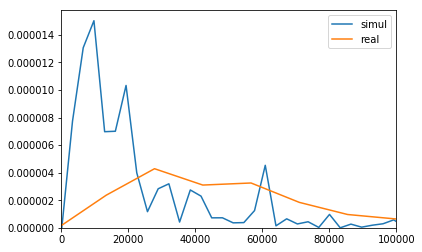

In [135]:
fig, ax = plt.subplots()
sns.kdeplot(pay_list, label='simul', ax=ax)
sns.kdeplot(p_test, label='real', ax=ax)
ax.set_xlim(0,100000)
plt.legend()

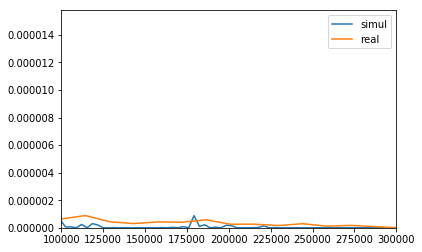

In [137]:
fig, ax = plt.subplots()
sns.kdeplot(pay_list, label='simul', ax=ax)
sns.kdeplot(p_test, label='real', ax=ax)
ax.set_xlim(100000,300000)
plt.legend()

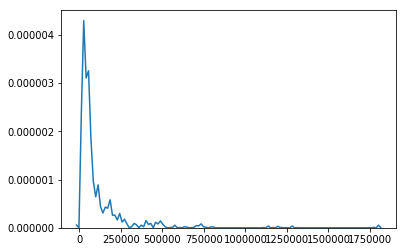

In [131]:
sns.kdeplot(p_test)

In [143]:
real_num_10 = []

for l in slot_result_per_game:
    real_num_10.append(l.count('10'))

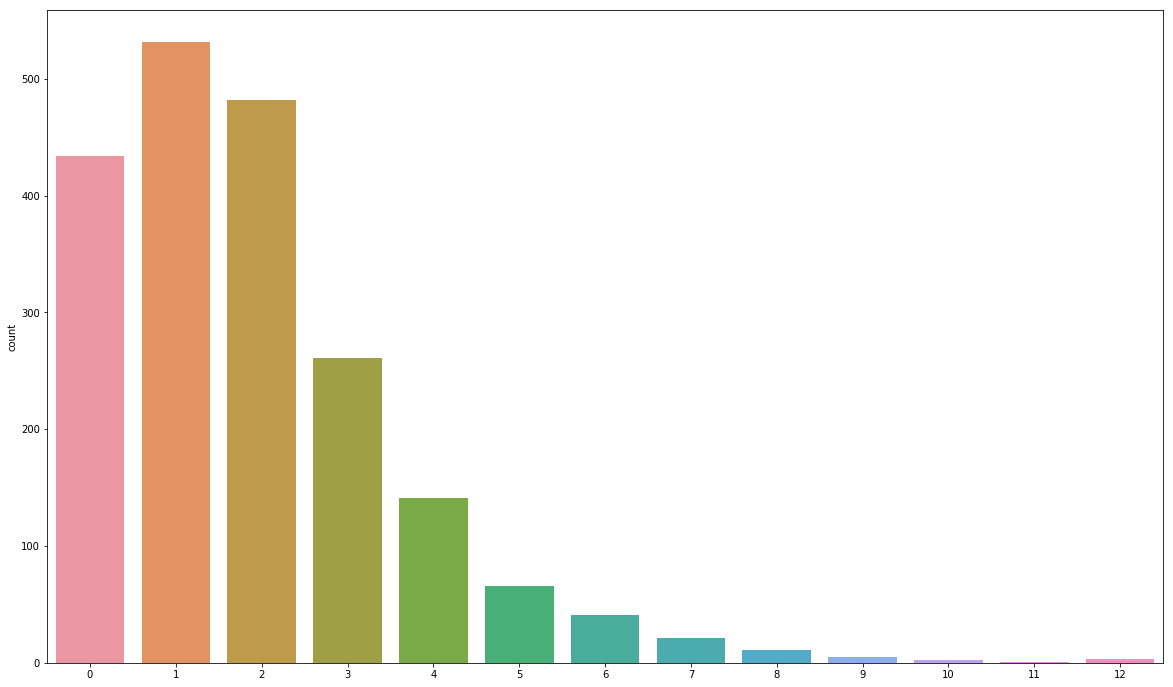

In [144]:
plt.figure(figsize=(20,12))
sns.countplot(real_num_10)
plt.show()

In [145]:
simul_num_10 = []

for l in simul_result_per_game:
    simul_num_10.append(l.count('10'))

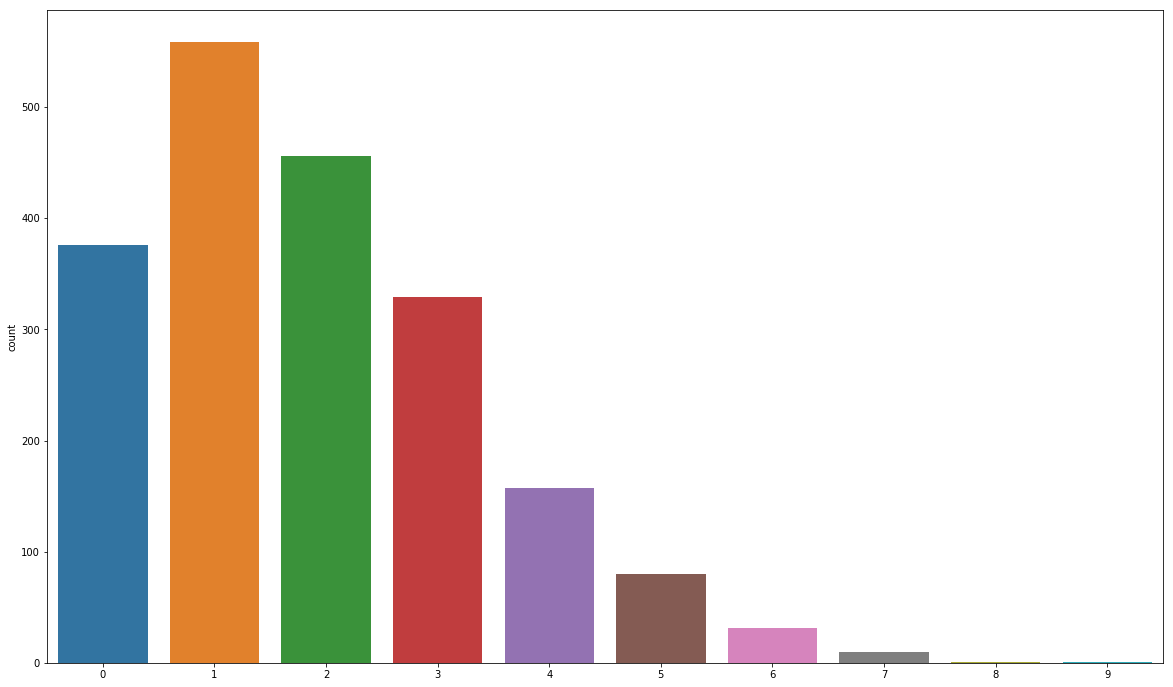

In [146]:
plt.figure(figsize=(20,12))
sns.countplot(simul_num_10)
plt.show()